# Логистическая регрессия
## Постановка задачи
Дан массив $X\in\R^n$ и вектор $y\in\{0, 1\}^n$. Настроить модель логистической регрессии

## Функция ошибок
$$ J(\theta) = -\frac{1}{m}\sum_{i=1}^m[y_i\log(h_\theta(x_i)) + (1-y_i)\log(1-h_\theta(x_i))] + \frac{\lambda}{2m}\sum_{i=1}^m\theta_i^2 $$

## Градиентный спуск
$$ \theta := \theta - \frac{1}{\alpha} X^T (\sigma(X\theta)-y), \ \ \sigma(z)=\frac{1}{1+\exp(-z)} $$

## Двумерный случай

In [1]:
from logistic import LogisticRegression
from logistic import cv_score
from logistic import contour_plot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

## Создаём тестовый датасет

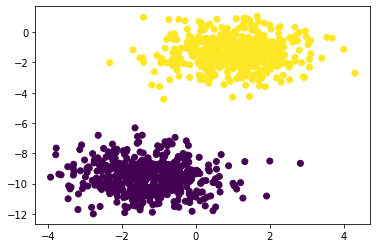

In [2]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=2)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Настраиваеем модель

In [3]:
m = LogisticRegression()
m.fit(X, y)

## Визуализируем результат

theta params: [6.66943936 0.99797434 1.29719056],
best score: 0.0069355635823264055


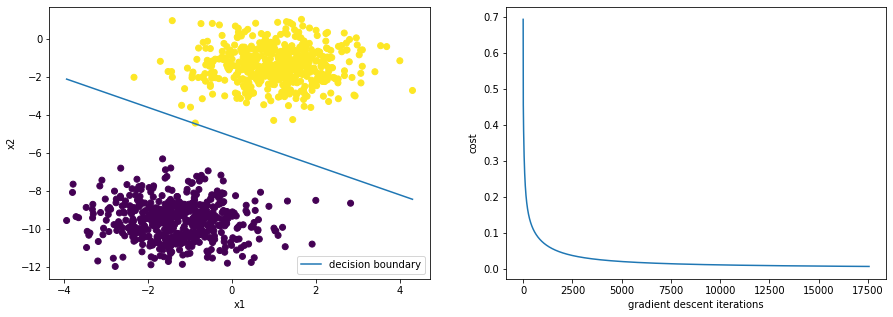

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

x_plt = np.linspace(X[:, 0].min(), X[:, 0].max(), 2)
y_plt = -(m.theta[0] + x_plt * m.theta[1]) / m.theta[2]

ax[0].plot(x_plt, y_plt, label='decision boundary')
ax[0].scatter(X[:, 0], X[:, 1], c=y)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].legend()

ax[1].plot(m.cost_history)
ax[1].set_xlabel('gradient descent iterations')
ax[1].set_ylabel('cost')

print(f"theta params: {m.theta},\nbest score: {m.best_score}")

## Эксперименты

0.3724422329437263

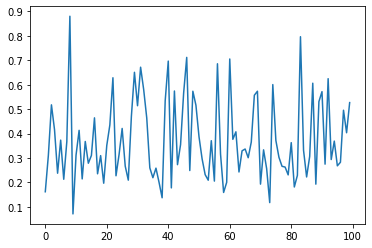

In [6]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2)
cv = cv_score(X, y, n_splits=100)
plt.plot(cv)
cv.mean()

# Добавление признаков
Для решаюших границ более сложного вида задействуем feature mapping и регуляризацию

## Загружаем датасет

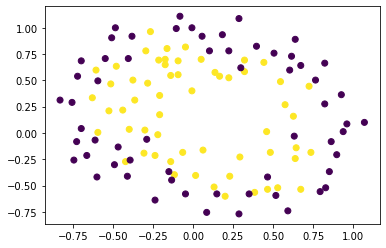

In [7]:
train = pd.read_csv("ex2data2.txt", names=['x1', 'x2', 'y'])
y = train.pop('y')
X = np.array(train)
plt.scatter(X[:, 0], X[:, 1], c=y)

## Настраиваем модель

In [9]:
m = LogisticRegression()
m.fit(X, y, feat_mapping=True, max_exp=6, regul=1)

## Строим линии уровня

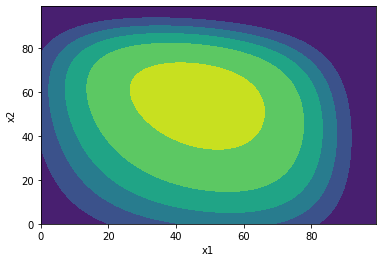

In [10]:
contour_plot(m, max_exp=6, data=X, s=[100,100])

## Эксперименты

0.6142090137522336

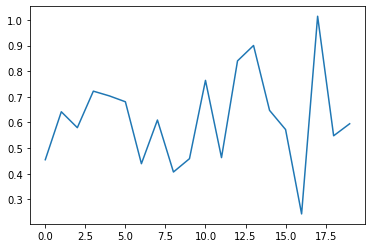

In [11]:
cv = cv_score(X, y, n_splits=20, regul=1, feat_mapping=True, max_exp=6)
plt.plot(cv)
cv.mean()